<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1128-Deep%20Learning%20TensorFlow-Keras-01~04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 03. 케라스(Keras)**

## **01. 딥러닝 준비**

### 1-1 주요 용어

#### 1-1-1 하이퍼 파리미터(hyper-parameter)
: 사용자가 직접 설정해야 하는 값  
- 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요하다.

#### 1-1-2 과소적합 vs. 과대적합(undefitting vs. overfitting)
- 과소적합: 모델이 충분히 학습되지 않은 경우에 예측 성능이 떨어지는 상태
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
- 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 한다.
- 훈련 데이터를 잘 구성하는 것도 물론 중요하다.
    - 예측 데이터와 분포가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 한다.
- 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정한다.


#### 1-1-3 에포크(epoch)
- 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정이다.
- 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)를 1 epoch라고 하며, '에포크'라고 읽는다.

#### 1-1-4 손실함수(loss function)
- 쉽게  '예측 값과 정답 값의 차이 또는 오차(Error)'라고 말할 수 있다.
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 한다.
    - 분류
        - 이진 분류(binary classification), 출력층의 활성화 함수(activation fucntion)가 'sigmoid'인 경우 - binary_crossentropy
        - 다중 분류(multi-class classification), 대상이 되는 클래스가 원핫 벡터인 경우 - categorical_crossentropy
        - 정답 클래스가 원핫 인코딩이 아닌 레이블 값으로 표현되어 서로 다른 숫자로 구분된 경우 - sparse_categorical_crossentropy
    - 회귀
        - 평균제곱오차(Mean Squared Error), 평균절대값오차(Mean Absolute Error), 후버(Huber) 등이 사용된다.
- 다음과 같이, 클래스 및 함수 형태로 정의되어 있는 손실함수 지정하여 사용
    ```
    import tensorflow as tf

    # 클래스
    tf.keras.losses.BinaryCrossentropy()

    # 함수
    tf.keras.losses.binary_crossentropy
    ```




#### 1-1-5 경사하강법(gradient descent)
-: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
- 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

*경사하강법을 넘파이로 직접 구현해 보기*
- 손실함수 혹은 목적 함수 다음과 같이 정의한다.
$$ Loss = \frac{1}{2} ∑(y - y ̂)^2 $$
    - 1/2: 가중치에 대한 그래디언트(gradient)를 계산하기 쉽도록 추가된 상수 값
- 다음과 단순 선형회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현한다.
$$ y = wx + b$$
- 샘플 데이터셋을 생성하는 함수를 정의하고 임의의 w와 b 값을 지정하여 주어진 x에 대한 y 값을 생성한다. y 값을 생성할 때 약간의 노이즈도 추가한다.

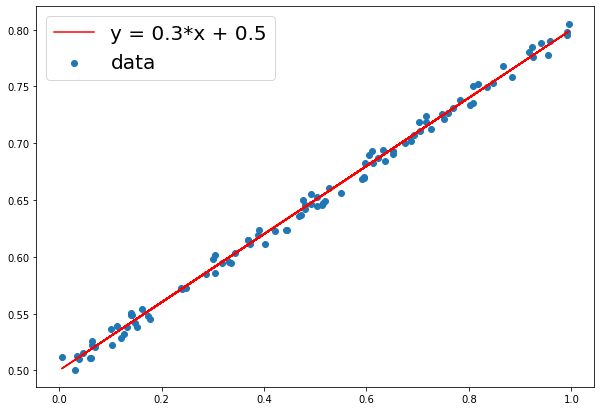

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 경사하강법 알고리즘의 핵심인 w, b에 대한 그래디언트를 구하는 부분만 구현하면 된다.
    -  그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.
-   - 가설함수를 $\hat{y} = wx + b$로 정의
    - 손실함수는 $\frac{1}{2}\sum_{i}(y-\hat{y})^2$
    - a는 학습률(learning rate)을 의미
- 그래디언트 업데이트 최종 수식
    - $w - a\sum_{i}(y-\hat{y})(x)$
    - $b - a\sum_{i}(y-\hat{y})$
- 넘파이로 최적화하는 과정 구현해 본다.
    - 최대 반복 횟수 지정하고 오차가 0.005 이내로 수렴하면 반복문 종료한다.

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.21775, b = 0.59071 error = 0.87790
 5 w = 0.21364, b = 0.54455 error = 0.03512
10 w = 0.22673, b = 0.53743 error = 0.02574
15 w = 0.23796, b = 0.53162 error = 0.01900
20 w = 0.24750, b = 0.52669 error = 0.01415
25 w = 0.25559, b = 0.52251 error = 0.01065
30 w = 0.26247, b = 0.51895 error = 0.00813
35 w = 0.26830, b = 0.51594 error = 0.00631
40 w = 0.27326, b = 0.51338 error = 0.00500
------------------------------------------------------------
41 w = 0.3, b = 0.5 error = 0.00479


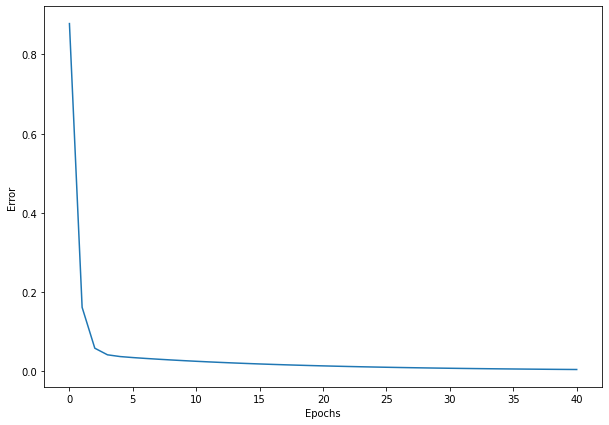

In [3]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

- 종료 후 w, b 계수를 확인하면 샘플 데이터셋 생성할 때 설정한 w, b 계수와 비슷한 값이다.

### 1-2 딥러닝 프로세스

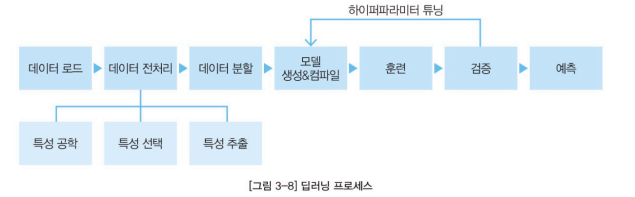

#### 1-2-1 데이터 전처리
: 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

#### 1-2-2 모델 생성
: 모델의 구조를 정의하고 생성하는 단계
- 순차적인 구조의 모델은 Sequential API로 구현한다.
- 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있다.

#### 1-2-3 모델 컴파일
: 딥러닝 모델의 구조를 정의하고 생성한 뒤, 모델 훈련에 사용할 손실함수(loss), 옵티 마이저(optimizer), 평가지표(metrics) 등을 compile() 메소드를 적용하여 설정하는 단계


#### 1-2-4 모델 훈련
: 모델을 훈련하는 단계
- fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달한다.
    - 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정한다.

#### 1-2-5 모델 검증
: 훈련이 완료된 모델을 검증하는 단계
- 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다,
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 계속 반복한다.


#### 1-2-6 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환한다.

## **02. 단순 신경망 훈련**

### 2-1 선형회귀
- 텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습
$$y = wx + b$$
    - w: 가중치(weight)
    - b: 편향(bias)

### 2-2 뉴런(Neuron)
: 인공 신경망 모델을 구성하는 하나의 신경, 노드(node)
- 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨

### 2-3 Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 떄문에 완전 연결층(Fully Connected Layer)이라고도 부름
- Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정 가능

```
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')
```



### 2-4 데이터셋 만들기
- 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해서 x, y 데이터를 생성

In [4]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


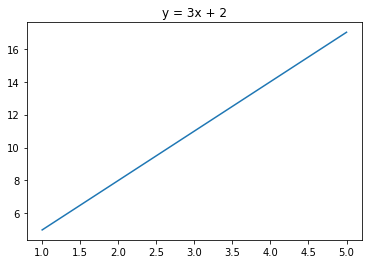

In [5]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 2-5 Sequential API
- 텐서플로 케라스는 세 가지 방식으로 모델을 생성할 수 있음. 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있음
- Sequential API 방식: 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
    - 입력 레이어부터 출력 레이어까지 순서를 가짐
    - 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있어 이 경우에는 Functional API를 사용해야 함

#### 2-5-1 모델 구조
- 두 가지 방법으로 모델을 구성 가능함
    1. 리스트형 정의
        - 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 됨

In [6]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

-    2. add 함수로 레이어 추가
        - 여러 개의 층을 추가하려면 add 함수를 반복해서 여러 번 사용해야 함

In [7]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2 입력 데이터 형태
- Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함
    - input_shpae 매개변수는 주입할 데이터셋의 shape를 투플 혹은 리스트로 지정 가능

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150,4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

#### 2-5-3 단순선형회귀 모델 정의
- 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용함

In [24]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

### 2-6 모델 요약

In [25]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params: 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수

### 2-7 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 등을 정의함
- 클래스 인스턴스, 함수 혹은 사전 정의된 문자열로 지정 가능함
    - 클래스 인스턴스로 지정할 경우 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터를 직접 지정할 수 있음
    - 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 수정은 어렵다는 한계 존재

In [26]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [27]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [28]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [29]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련

In [30]:
# 훈련
history = model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 322ms/step - loss: 50.1907 - mae: 6.7252
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 29.4063 - mae: 5.1912
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 17.2930 - mae: 4.0199
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 10.2330 - mae: 3.1256
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 6.1177 - mae: 2.4427


- 매 epoch당 loss 값을 보면 손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있음
    - 모델이 잘 학습되고 있는 것을 알 수 있지만 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있음
    - 모델은 현재 과소적합 상태
- 이번에는 epoch에 1200을 지정하여 충분히 훈련

In [31]:
# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 12ms/step - loss: 3.7185 - mae: 1.9212
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.3193 - mae: 1.5229
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.5029 - mae: 1.2187
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.0261 - mae: 0.9862
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.7472 - mae: 0.8086
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.5837 - mae: 0.6728
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.4874 - mae: 0.5703
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.4303 - mae: 0.5407
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.3961 - mae: 0.5179
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.3751 - mae: 0.5000
Epoch 11/1200
1/1 [==============================] - 0s 10ms

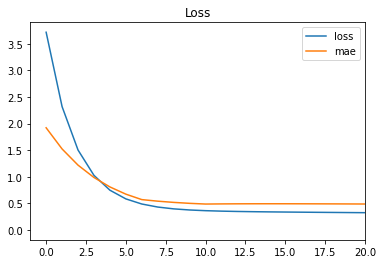

In [32]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

- 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보이고 있음

### 2-9 검증
- 일반적으로 검증 데이터셋을 입력하여 검증하고, 별도의 검증 셋을 만들어 두지 않았으면 훈련 데이터셋의 x, y를 대입하여 반환되는 결과를 확인


In [33]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 102ms/step - loss: 1.0954e-04 - mae: 0.0090


[0.00010953521268675104, 0.008983040228486061]

### 2-10 예측

In [34]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 136ms/step


array([[32.043415]], dtype=float32)

## **03. 심층 신경망으로 이미지 분류**

### 3-1 케라스 내장 데이터셋 로드
- 데이터셋은 tensorflow, keras, datasets 서브패키지에 위치하며 지원하는 목록은 다음과 같음
    - boston_housing: 보스톤 주택 가격 데이터셋(회귀)
    - cifar10: CIFAR10 이미지 분류 데이터셋(분류) 
    - cifar100: CIFAR100 이미지 분류 데이터셋(분류)
    - mnist: mnist 손글씨 데이터셋(분류)
    - fashion_mnist: 의류 데이터셋(분류)
    - imdb:IMDb 영화 데이터셋(분류)
    -  reuters: Reuters 뉴스 토픽(분류)

In [35]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [36]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [39]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


- shape: (데이터셋 크기, 이미지의 세로 픽셀 크기, 이미지의 가로 픽셀 크기)

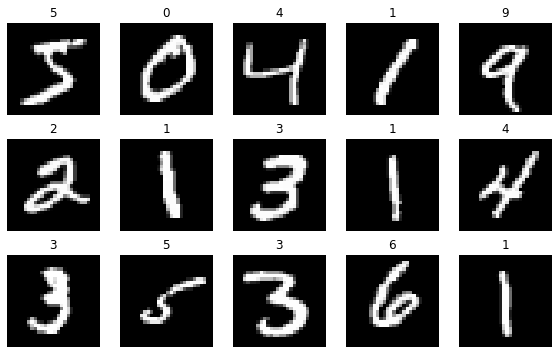

In [38]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

- minist 데이터셋은 사람의 필기체로 쓰인 0~9까지의 숫자들로 이루어진 데이터셋

### 3-2 데이터 전처리
- 이미지 데이터에 대하여 정규화를 통해 데이터의 범위 조절
    - x_train은 넘파이 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

In [40]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [41]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [42]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [43]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어
- 정규화가 끝난 x_train의 shape은 (60000, 28, 28)임. 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨
- 샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력으로 볼 수 있음.
- Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 함
- 이미지 데이터를 1차원으로 전처리

In [44]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


-  Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능

In [45]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수
: 입력을 비선형 출력으로 변환해주는 함수
- 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함
- 한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨
- 자주 사용되는 활성화 함수
    - 시그모이드(Sigmoid):
$$ sigmoid(x) = \frac{1}{(1+e^{-x})} $$
    - 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh): $$ tanh(x) = \frac{(e^x-e^{-x})}{(e^x+e^{-x})} $$
    - ReLU(Recitfied Unit): $$ ReLU(x) = max(x,0) $$
    - Leaky ReLU: $$ Leaky ReLU(x) = max(x,0.1x) $$

In [46]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

- 별도의 층처럼 적용할 수도 있음
    - Dense 레이어 다음에 배치 정규화(Batch Normalization)를 적용한 후에 활성화 함수를 적용하고자 할 때 많이 사용함. 즉, 레이어 구성을 조금 더 커스터마이징하고 싶을 때 구분하여 처리

In [47]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력
- 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적
    - 데이터셋의 크기를 나타내는 숫자를 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape=(28, 28)를 input_shape로 지정
- 분류 모델의 가장 마지막 레이어는 출력층임. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

- 출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용
    - 다중 분류 문제에서는 softmax 활성화 함수 사용
    - 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수 적용(단, 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수 사용)

In [49]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

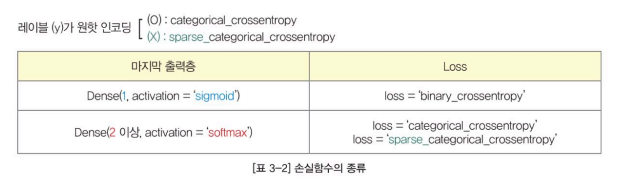

In [50]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [51]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

- minist 손글씨 데이터셋은 출력 데이터가 원핫 벡터가 아니고, 0~9까지 레이블 값을 갖기 때문에 손실함수로 'sparse_categorical_crossentropy' 지정하면 됨

### 3-7 옵티마이저
- 옵티마이저(optimizer): 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
- 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘하는 것으로 알려져 있음
- 케라스에서 지원하는 옵티마이저 목록
    - SGD
    - Adam
    - Adagrad
    - Nadam
    - RMSprop
    - Adadelta
    - Adamax
    - Ftrl

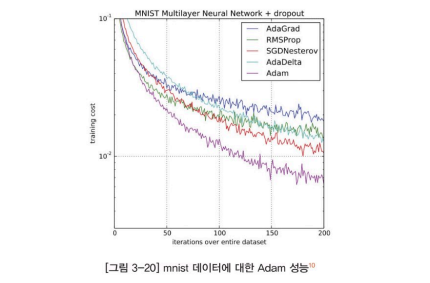

- 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음
    - 문자열로 지정할 때는 클래스 이름을 소문자로 표기
    - 클래스 인스턴스로 지정할 때는 문자열로 지정할 때와 다르게, 학습률(learning_rate: lr로 표기)과 같은 하이퍼파라미터를 직접 설정 가능

In [52]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8 평가지표
- 분류 모델에 대한 평가지표(metrics)는 정확도를 나타내는 'accuracy'(또는 'acc')가 가장 많이 사용 되며 'auc', 'precision', 'recall' 등의 지표도 많이 사용됨
-  모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있음
- 평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정 가능

In [53]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [54]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### 3-9  훈련
- mnist 손글씨 데이터셋은 10,000개로 구성된 별도의 검증 셋이 존재함
- 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력함
    - 검증 셋을 지정하는 방법은 validation_data 매개변수에 투플 형식의 검증 셋을 지정해주면 됨

In [55]:
# 훈련
model.fit(x_train, y_train, 
          # 검증 셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2340 - accuracy: 0.9309 - val_loss: 0.1264 - val_accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0953 - accuracy: 0.9713 - val_loss: 0.0976 - val_accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.0807 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0873 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0762 - val_ac

### 3-10 평가
- 10회의 epoch가 끝나고 훈련이 종료된 뒤 evaluate() 메소드로 모델 성능을 검증하고 평가 결과 확인
    - 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환

In [56]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9819
검증 셋 정확도: 0.9818999767303467


### 3-11 예측
- 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업 수행할 수 있음
- predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환함
    - 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 x_test 사용

In [57]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [58]:
# 예측 결과 출력
predictions[0]

array([2.4002493e-14, 8.4609253e-10, 1.3957638e-09, 1.0387280e-10,
       1.9514832e-09, 1.0916650e-14, 6.0559630e-13, 9.9999994e-01,
       9.2224913e-15, 3.7053629e-09], dtype=float32)

- 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것
    - softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률값
    -  이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스
- 넘파이 배열의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과 확인 가능

In [59]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


- matplotlib 시각화 라이브러리의 imshow() 메소드 활용하여 15개 예측한 결과 시각화

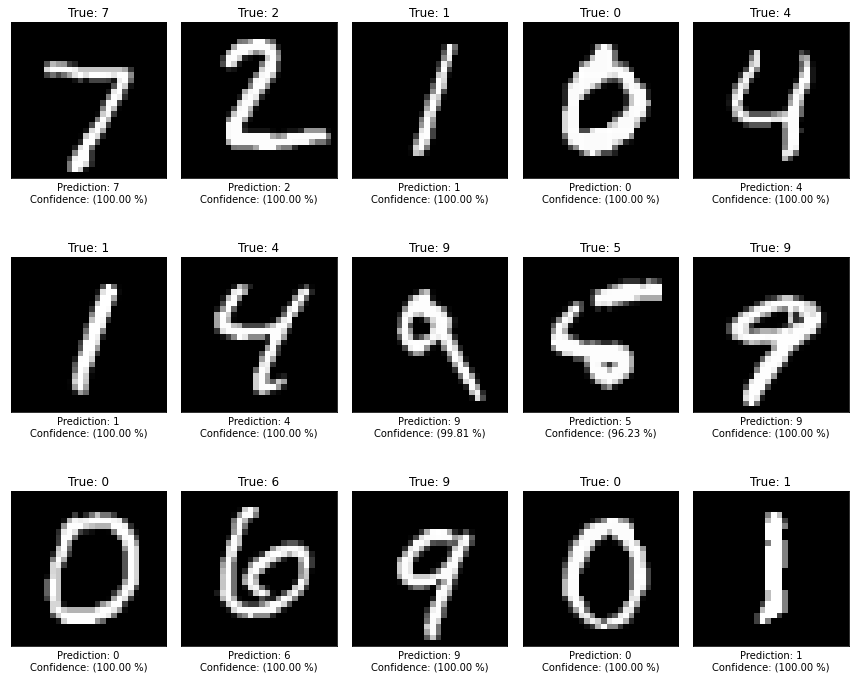

In [61]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

## **04. 모델 세부 설정**

In [62]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


### 4-1 초기값 설정
- 레이어의 초기화 방법을 다르게 설정할 수 있음
    - Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정되어 있음

In [63]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

- 기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 kernel_initializer 매개변수에 설정하면 됨
    - 옵티마이저, 손실함수와 마찬가지로 문자열로 지정하는 방법과 클래스 인스턴스로 지정하는 방법 존재

In [65]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

- 케라스에서 지원하는 자주 사용되는 초기화 목록
    - 'glorot_normal', 'glorot_uniform': 글로럿 초기화(Xavier 초기화)
    - 'lecun_normal', 'lecun_uniform': Yann Lecun 초기화
    - 'he_normal', 'he_uniform': He 초기화
    - 'random_normal', 'random_uniform': 정규 분포, 연속균등 분포 초기화

### 4-2 규제(Regularization)
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 함
- 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있음
    - 다음 코드에서 kernel_regularizer 설정이 None으로 설정되어 있음
- 레이어에 규제를 적용하기 위해서는 별도로 설정해 주어야 함

In [66]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_23',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 모델이 과대적합하는 것을 방지해 주기 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있음
- 케라스에서 지원하는 규제는 L1, L2 규제 있음
    - 적용하기 위해서는 kernel_regularizer에 규제 지정

In [67]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3 드롭아웃(Dropout)
- 딥러닝 모델에서는 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 갖지 못하는 문제가 자주 발생하는 편임
- 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보이는 것으로 알려짐
- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드 활용됨

In [68]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화(Batch Normalization)
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함
- 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음
- 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드를 구현할 필요가 없고, 클래스 인스턴스를 생성하여 추가해주면 됨
- Dense 레이어에 ReLU 활성화 함수 추가한 모델과 배치 정규화 적용 후 ReLU 활성화 함수 추가한 모델 성능 비교 

In [69]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

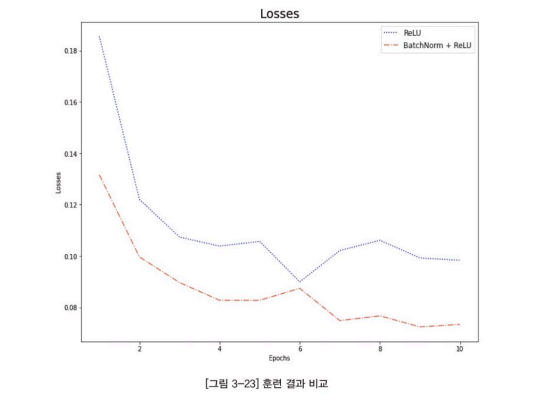
- 그래프를 보면, 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것을 확인할 수 있음

### 4-5 활성화(activation) 함수

In [71]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [72]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

- 앞에서 생성한 2개의 모델과 LeakyReLU 활성화 함수로 변경한 모델까지 더해 총 3개의 모델을 동일한 조건으로 10번의 epoch동안 훈련한 후 수렴 속도 확인
    - model_a: Dense 레이어 + ReLU 활성화 함수
    - model_b: Dense 레이어 + 배치 정규화
    - model_c: Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [73]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.9160 - val_loss: 0.1789 - val_accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1378 - accuracy: 0.9593 - val_loss: 0.1222 - val_accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1021 - accuracy: 0.9693 - val_loss: 0.1058 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.0971 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0903 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.1067 - val_accuracy:

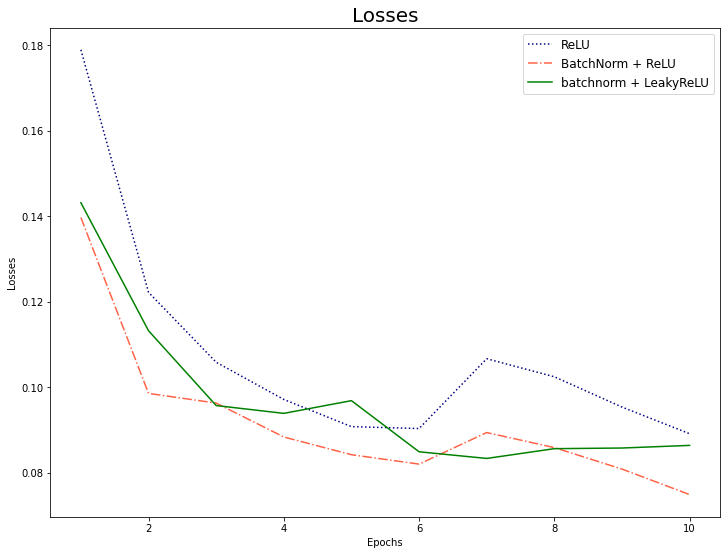

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

- minist 데이터셋은 모델별 차이가 크지는 않음
- 좀 더 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수 적용해 보면서 모델의 훈련 추이 관찰해 볼 필요 있음